# Day2-2 OfficeLayout from Jupyter

GhPythonで作成したOfficeLayout.ghをJupyterNotebookから計算させ、結果を分析します

## ①初期設定

In [543]:
import compute_rhino3d.Util
import compute_rhino3d.Grasshopper as gh
import rhino3dm
import json, os, base64
import requests

In [544]:
url = "http://localhost:8081/"
RHINO_COMPUTE_KEY = ""

compute_rhino3d.Util.url = url
RHINO_COMPUTE_HEADER = {'RhinoComputeKey': RHINO_COMPUTE_KEY}

In [545]:
def encode_gh_file(definition):
    encoded = None
    if os.path.isfile(definition):
        if(definition.endswith('gh')):
            with open(definition, 'rb') as gh:
                content_bytes = gh.read()
                encoded = base64.b64encode(content_bytes)
        else:
            with io.open(definition, 'r', encoding='utf-8-sig') as ghx:
                definition = ghx.read()
    if not encoded:
        encoded = base64.b64encode(definition.encode('utf-8'))
    return str(encoded, 'utf-8')

## ②ghファイルをRhinoComputeサーバーへアップロード

In [546]:
gh_path = "./gh/OfficeLayout.gh"

encoded = encode_gh_file(gh_path)

In [547]:
res = requests.post(url=url+"io",json=
    {
        "absolutetolerance": 0.01,
        "angletolerance": 0.01,
        "algo": encoded,
        "pointer": None,
        "cachesolve": False,
        "recursionlevel": 0,
        "values": [],
        "warnings": [],
        "errors": []
    },
    headers=RHINO_COMPUTE_HEADER

)

if res.status_code == 200:
    print("Success")
    res_json = res.json()
    cachekey = res_json["CacheKey"]
    print("CacheKey: {}".format(cachekey))
    print("Inputs: {}".format(res_json["InputNames"]))
else:
    print("Error")
    print(res.text)

Success
CacheKey: md5_99B002999C7F8204E1F046D13A5DD278
Inputs: ['Office_X', 'Office_Y', 'Void_Count', 'Void_Size', 'Desk_Count', 'Desk_Unit', 'Partition_Count', 'Partition_Unit']


In [548]:
res.json()

{'Description': '',
 'CacheKey': 'md5_99B002999C7F8204E1F046D13A5DD278',
 'InputNames': ['Office_X',
  'Office_Y',
  'Void_Count',
  'Void_Size',
  'Desk_Count',
  'Desk_Unit',
  'Partition_Count',
  'Partition_Unit'],
 'OutputNames': ['RH_OUT:Void_Plane',
  'RH_OUT:ID',
  'RH_OUT:X',
  'RH_OUT:Y',
  'RH_OUT:Other_Plane',
  'RH_OUT:Zone',
  'RH_OUT:Type',
  'RH_OUT:Desk_Objects',
  'RH_OUT:Desk_Plane',
  'RH_OUT:Partition_Objects',
  'RH_OUT:Partition_Plane',
  'RH_OUT:Accessibility',
  'RH_OUT:Accessibility_Plane',
  'RH_OUT:Communication',
  'RH_OUT:Communication_Count',
  'RH_OUT:Communication_Plane',
  'RH_OUT:Communication_Line'],
 'Icon': None,
 'Inputs': [{'Description': '',
   'AtLeast': 1,
   'AtMost': 1,
   'Default': 20.0,
   'Minimum': 1.0,
   'Maximum': 50.0,
   'Name': 'Office_X',
   'Nickname': None,
   'ParamType': 'Integer'},
  {'Description': '',
   'AtLeast': 1,
   'AtMost': 1,
   'Default': 45.0,
   'Minimum': 1.0,
   'Maximum': 50.0,
   'Name': 'Office_Y',
   'Nick

## ③リクエストを作成

### jsonの作成を自動化する

In [549]:
def create_item_input(param_name, input_type, value):
    data = {
        "ParamName": param_name,
        "InnerTree": { "0": [{ "type": input_type, "data": value }] }
    }
    return data

def create_param_tree(name, data):
    param_tree = gh.DataTree(name)
    param_tree.Append([0], [data])
    return param_tree

In [550]:
input_data = {
    'Office_X': 30, 
    'Office_Y': 30,
    'Void_Count': 7, 
    'Void_Size': 3, 
    'Desk_Count': 50, 
    'Desk_Unit': 2, 
    'Partition_Count': 30, 
    'Partition_Unit': 3
}

In [551]:
input_value = []
for key,value in input_data.items():
    input_value.append(create_item_input(key, "Systems.Integer", value))
input_value

[{'ParamName': 'Office_X',
  'InnerTree': {'0': [{'type': 'Systems.Integer', 'data': 30}]}},
 {'ParamName': 'Office_Y',
  'InnerTree': {'0': [{'type': 'Systems.Integer', 'data': 30}]}},
 {'ParamName': 'Void_Count',
  'InnerTree': {'0': [{'type': 'Systems.Integer', 'data': 7}]}},
 {'ParamName': 'Void_Size',
  'InnerTree': {'0': [{'type': 'Systems.Integer', 'data': 3}]}},
 {'ParamName': 'Desk_Count',
  'InnerTree': {'0': [{'type': 'Systems.Integer', 'data': 50}]}},
 {'ParamName': 'Desk_Unit',
  'InnerTree': {'0': [{'type': 'Systems.Integer', 'data': 2}]}},
 {'ParamName': 'Partition_Count',
  'InnerTree': {'0': [{'type': 'Systems.Integer', 'data': 30}]}},
 {'ParamName': 'Partition_Unit',
  'InnerTree': {'0': [{'type': 'Systems.Integer', 'data': 3}]}}]

## ④リクエストを作成

In [552]:
res = requests.post(url=url+"grasshopper",json=
    {
        "absolutetolerance": 0.01,
        "angletolerance": 0.01,
        "algo": None,
        "pointer": cachekey,
        "cachesolve": False,
        "recursionlevel": 0,
        "values": input_value,
        "warnings": [],
        "errors": []
    },
    headers=RHINO_COMPUTE_HEADER
)
res.json()

{'absolutetolerance': 0.0,
 'angletolerance': 0.0,
 'modelunits': 'Millimeters',
 'algo': '',
 'pointer': 'md5_99B002999C7F8204E1F046D13A5DD278',
 'cachesolve': False,
 'recursionlevel': 0,
 'values': [{'ParamName': 'RH_OUT:Desk_Objects',
   'InnerTree': {'{0;0}': [{'type': 'Rhino.Geometry.Mesh',
      'data': '{"version":10000,"archive3dm":60,"opennurbs":-1907588931,"data":"+n8CAMcFAAAAAAAA+/8CABQAAAAAAAAA5NTXTkfp0xG/5QAQgwEi8C25G1z8/wIAjwUAAAAAAAA4eAAAAB4AAADSHTOevfjl/9IdM569+OX/0h0znr345f/SHTOevfjl/wAAAAAAAAAAAAAAAABAr0AAAAAAAAAAAAAAAAAAQI9AAAAAAAAAAAAAAAAAAAAAAP8PpEb/P5xFAAAAAAHgq0YBgLtFAYBURAAAgD8AAIA/AACAPwAAgL8AAIC/AACAvwAAgD8AAIA/AACAvwAAgL//////AQCAAECVAAAAAAAAABUAAAAAAQAAAAEAAAAAAAAAAAAAAAAAAAAAAAAALUMc6+I2Gj8AAAAAAAAAAAAAAAAAABhAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAPA/h0TnShhX1j+HROdKGFe2PwAAAAACAAAAAM3MzMzMzOQ/AAEAgABAFQAAAAAAAAABAAAAAgAAAAQAAAACAAAAANmNOQkrNUDeAAAAAAEAAAABAAIDBQQGBwkICgsNDA4PERMSEBUUFhcZGBobHRweHyEgIiMlJCYnKSsqKC0sLi8xMDIzNTQ2Nzk4Ojs9PD4/QUNCQEVERkdJSEpLTUxOT1FQUl

## ⑤結果をrhinoファイルに保存する
### Rhinoファイルを作成

In [562]:
doc = rhino3dm.File3dm()
doc

### オブジェクトをRhinoファイルに追加する関数
今回はすべてMeshとNurbsCurveに変換してあるのでその2種類のみを対象に作ります

In [563]:
def add_objects(doc, val, name, color):
    # オブジェクトはInnerTree内にツリー形式で格納されています
    objs_trees = list(val["InnerTree"].values())
    # レイヤーを作成
    layer = rhino3dm.Layer()
    # レイヤーの設定
    layer.Name = name
    layer.Color = color
    # レイヤーをRhinoファイルに追加→indexにはLayerIndexが返ります
    index = doc.Layers.Add(layer)
    # オブジェクト
    for objs in objs_trees:
        for obj in objs:
            # オブジェクトを文字列からRhino.Geometryにデコード
            rhino_obj = rhino3dm.CommonObject.Decode(json.loads(obj['data']))
            # ObjectTypeを取得
            object_type = obj['type'].split(".")[-1]
            # アトリビュートを作成
            attribute = rhino3dm.ObjectAttributes()
            # レイヤー番号を指定
            attribute.LayerIndex = index
            # オブジェクトとアトリビュートをセットでRhinoファイルに追加
            if object_type == "Mesh":
                doc.Objects.AddMesh(rhino_obj, attribute)
            elif object_type == "NurbsCurve":
                doc.Objects.AddCurve(rhino_obj, attribute)
    return doc

### outputのparam nameごとに異なるレイヤーにオブジェクトを追加

In [564]:
result_values = res.json()["values"]

for val in result_values:
    # "RH_OUT:"を削除
    param_name = val["ParamName"].split(":")[1]
    # パラメータ名ごとに異なるレイヤーにオブジェクトを追加
    if param_name == "Desk_Objects":
        doc = add_objects(doc, val, param_name, (0, 0, 255, 255))
    elif param_name == "Desk_Plane":
        doc = add_objects(doc, val, param_name, (0, 0, 255, 255))
    elif param_name == "Partition_Objects":
        doc = add_objects(doc, val, param_name, (255, 0, 0, 255))
    elif param_name == "Partition_Plane":
        doc = add_objects(doc, val, param_name, (255, 0, 0, 255))
    elif param_name == "Void_Plane":
        doc = add_objects(doc, val, param_name, (110, 110, 110, 255))
    elif param_name == "Other_Plane":
        doc = add_objects(doc, val, param_name, (200, 200, 200, 255))
    elif param_name == "Accessibility_Plane":
        doc = add_objects(doc, val, param_name, (200, 200, 200, 255))
    elif param_name == "Communication_Plane":
        doc = add_objects(doc, val, param_name, (200, 200, 200, 255))
    elif param_name == "Communication_Line":
        doc = add_objects(doc, val, param_name, (255, 255, 255, 255))

### ファイルに書き込み

In [565]:
filename = 'result.3dm'        
doc.Write(filename)

True

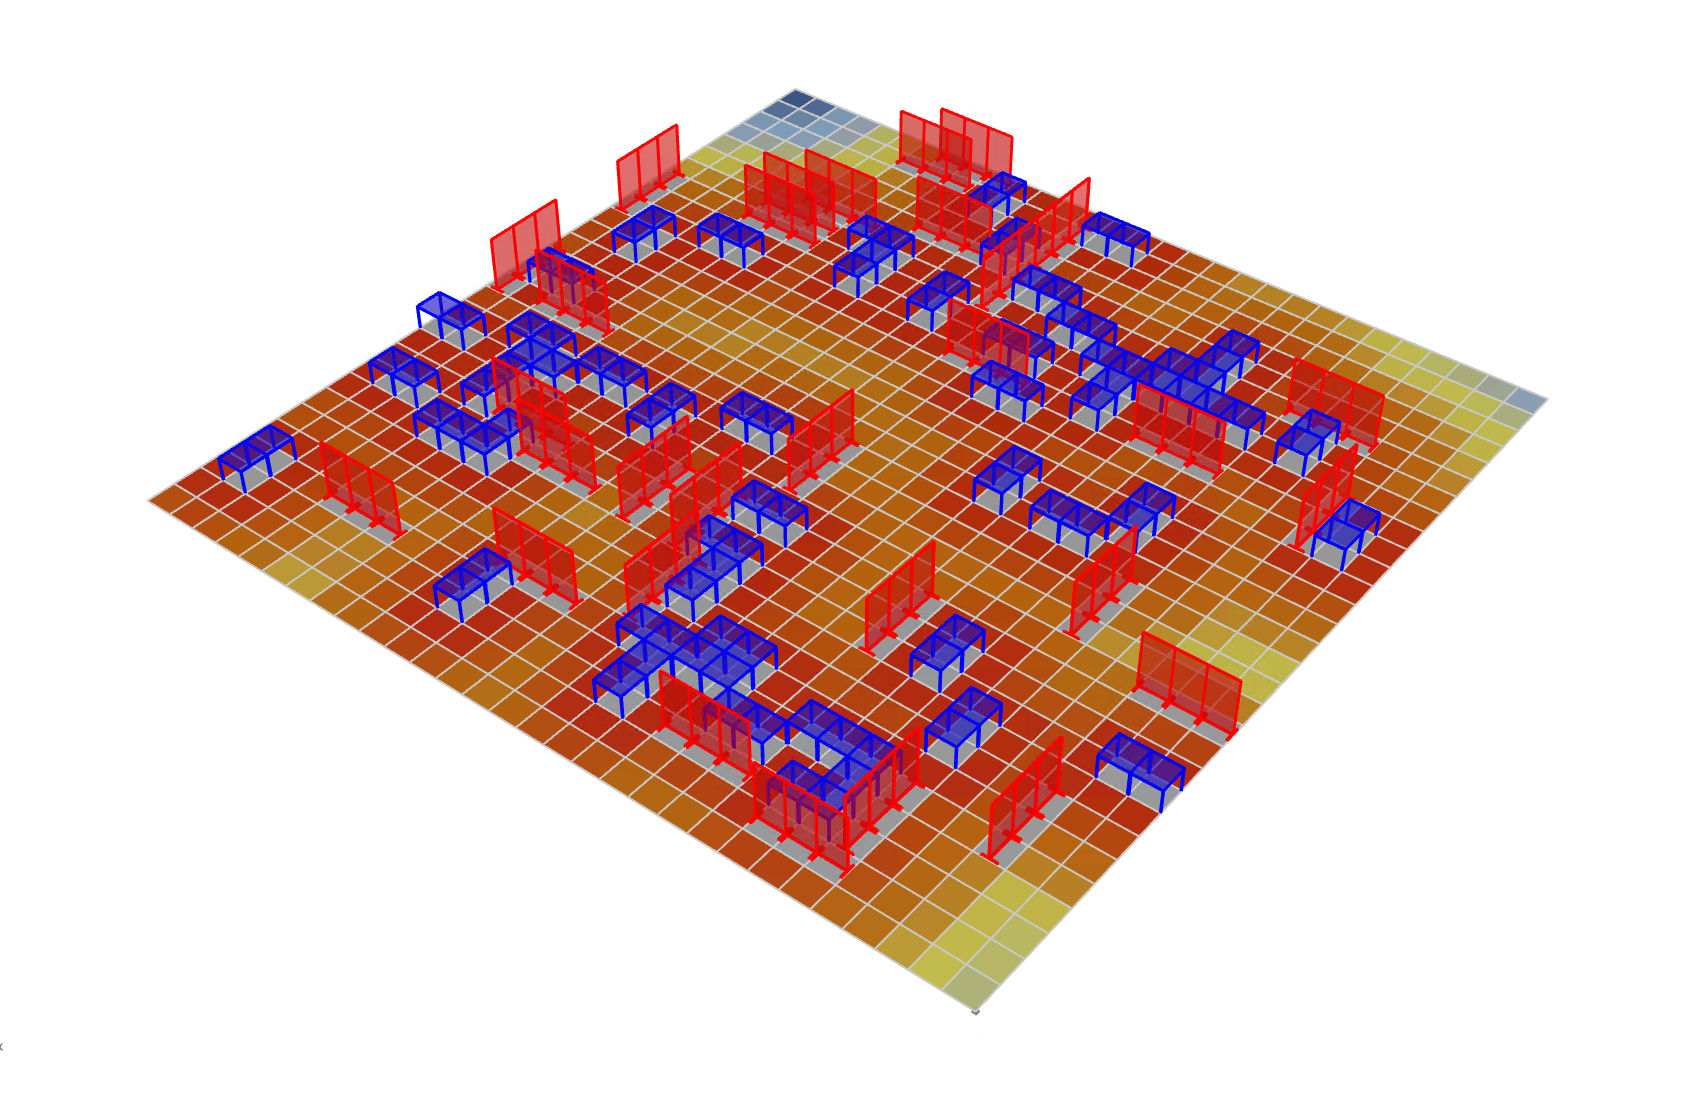

## ⑥数値の結果を分析する

### 文字列を数値かどうか判定する関数
- InnerTree内のtypeから型を判定します。

In [588]:
def get_type(data):
    data_type = data['type'].split(".")[-1]
    return data_type

### データを辞書に格納

In [589]:
import numpy as np

data = {}
for val in result_values:
    # パラメータ名を取得
    param_name = val["ParamName"].split(":")[1]
    if param_name == "ID":
        keys = [json.loads(d["data"]) for d in val["InnerTree"]["{0;0}"]]
    elif param_name == "X":
        # intの場合は"Rhino.Geometry.Int32"なのでInt32であればintに変換、それ以外はNaNに変換
        data[param_name] = [int(json.loads(d["data"])) if get_type(d)=="Int32" else np.NaN for d in val["InnerTree"]["{0;0}"]]
    elif param_name == "Y":
        data[param_name] = [int(json.loads(d["data"])) if get_type(d)=="Int32" else np.NaN for d in val["InnerTree"]["{0;0}"]]
    elif param_name == "Zone":
        data[param_name] = [int(json.loads(d["data"])) if get_type(d)=="Int32" else np.NaN for d in val["InnerTree"]["{0;0}"]]
    if param_name == "Type":
        data["type"] = [json.loads(d["data"]) for d in val["InnerTree"]["{0;0}"]]
    elif param_name == "Accessibility":
        # floatの場合は"Rhino.Geometry.Double"なのでDoubleであればintに変換、それ以外はNaNに変換
        data[param_name] = [float(json.loads(d["data"])) if get_type(d)=="Double" else np.NaN for d in val["InnerTree"]["{0;0}"]]
    elif param_name == "Communication_Count":
        data[param_name] = [int(json.loads(d["data"])) if get_type(d)=="Int32" else np.NaN for d in val["InnerTree"]["{0;0}"]]

### Pandas Dataframeに変換

In [591]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data, index=keys)
df.sort_index()

Communication_Count  Accessibility   type   X   Y  Zone
X00Y00                  NaN    3162.277660  other   0   0     0
X00Y01                  NaN    2236.067977  other   0   1     0
X00Y02                  NaN    1414.213562  other   0   2     0
X00Y03                  NaN    1000.000000  other   0   3     0
X00Y04                  NaN    1414.213562  other   0   4     0
...                     ...            ...    ...  ..  ..   ...
X29Y25                  NaN    3000.000000  other  29  25     3
X29Y26                  NaN    2000.000000  other  29  26     3
X29Y27                  NaN    1000.000000  other  29  27     3
X29Y28                  1.0            NaN   desk  29  28     3
X29Y29                  1.0            NaN   desk  29  29     3

[900 rows x 6 columns]

### データをプロット

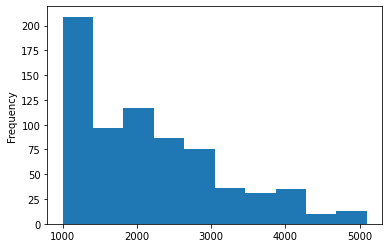

In [604]:
df["Accessibility"].plot(kind="hist")
plt.show()

<AxesSubplot:xlabel='Accessibility', ylabel='Count'>

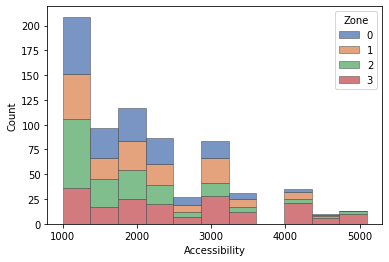

In [611]:
sns.histplot(df, 
             x="Accessibility", 
             hue="Zone", 
             multiple="stack",
             palette="deep",
             edgecolor=".3",
             linewidth=.5)

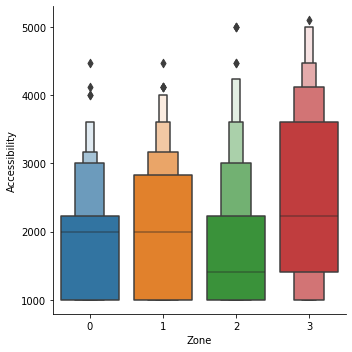

In [613]:
sns.catplot(data=df, x="Zone", y="Accessibility", kind="boxen")

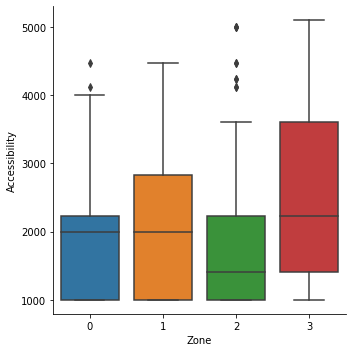

In [607]:
sns.catplot(data=df, x="Zone", y="Accessibility", kind="box")

<AxesSubplot:xlabel='Communication_Count', ylabel='Count'>

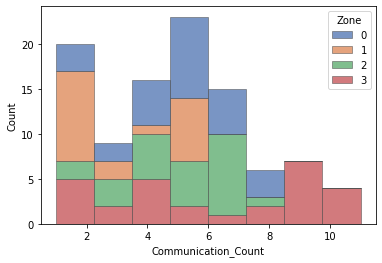

In [345]:
sns.histplot(df, 
             x="Communication_Count", 
             hue="Zone", 
             multiple="stack",
             palette="deep",
             edgecolor=".3",
             linewidth=.5)

<AxesSubplot:xlabel='Zone', ylabel='Communication_Count'>

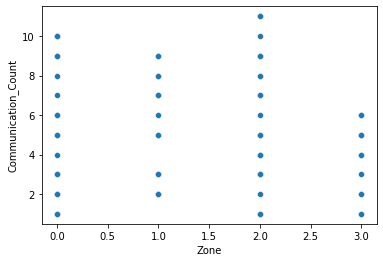

In [602]:
sns.scatterplot(data=df, 
                x="Zone", 
                y="Communication_Count",
)

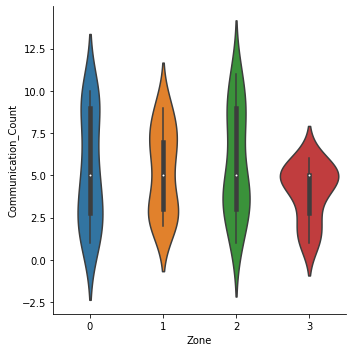

In [615]:
sns.catplot(data=df, x="Zone", y="Communication_Count", kind="violin")

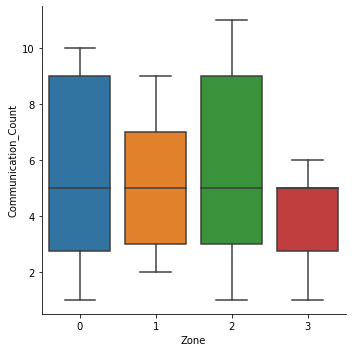

In [600]:
sns.catplot(data=df, x="Zone", y="Communication_Count", kind="box")

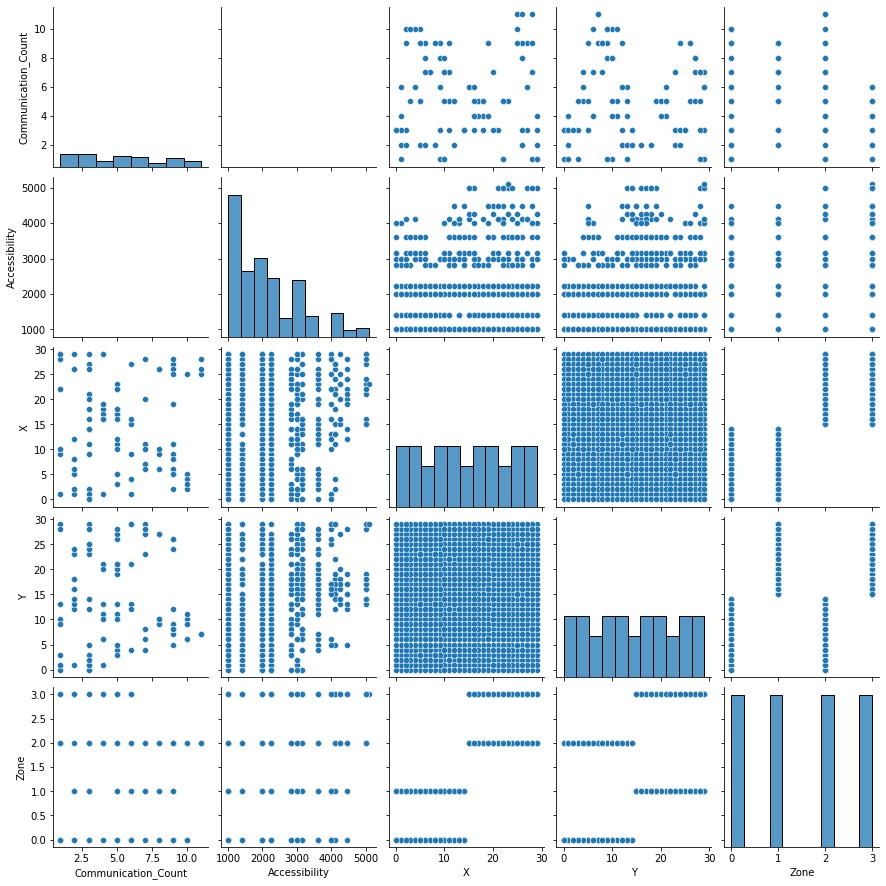

In [595]:
sns.pairplot(data=df)

## ⑦結果のオブジェクトを確認する
htmlで3Dオブジェクトを描画できるThree.jsを使ってrhinoファイルを表示

https://threejs.org/examples/#webgl_loader_3dm

1. Day2/ViewerのhtmlファイルをVSCodeで開きGoLive
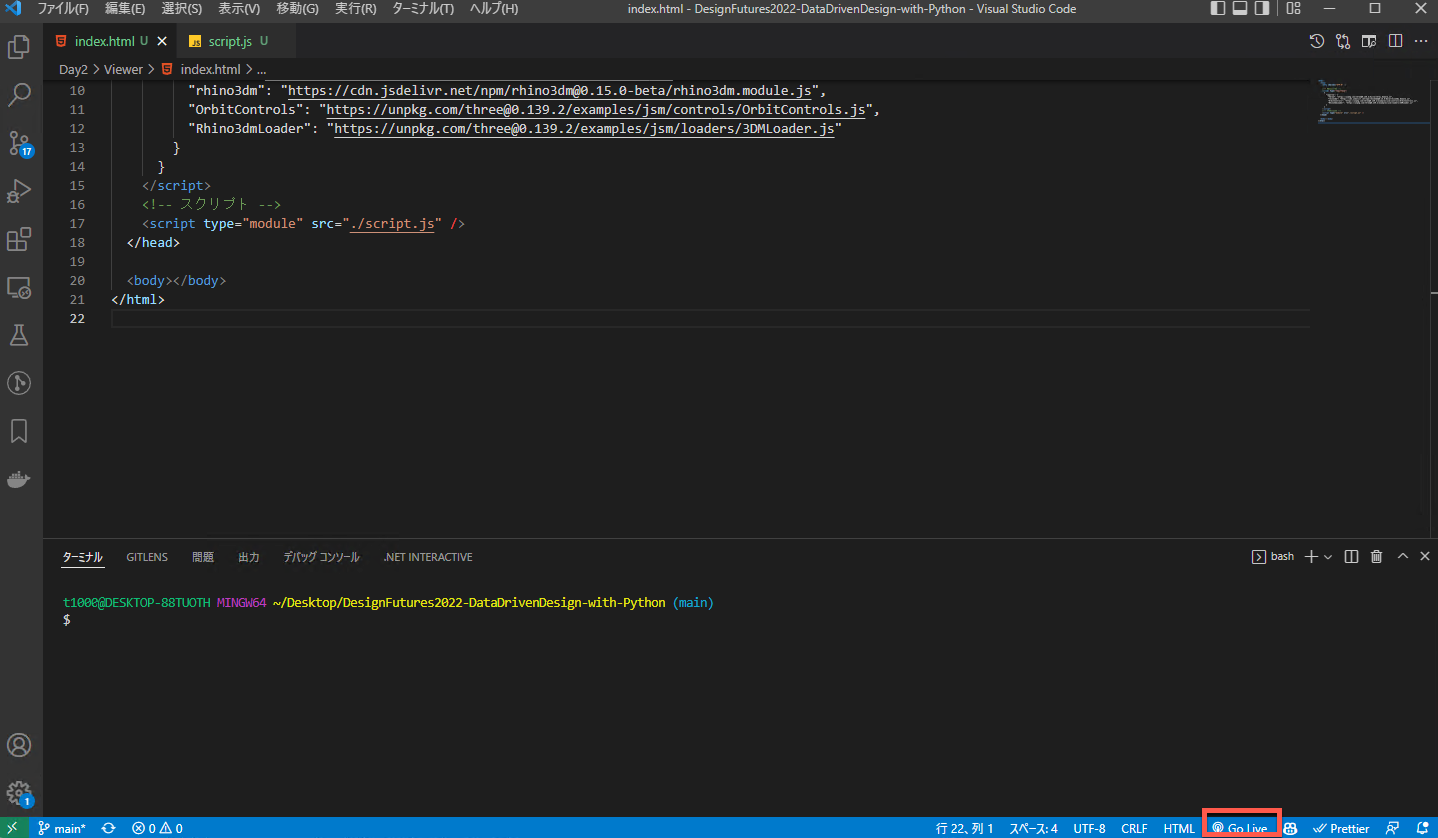
2. ブラウザが立ち上がり表示される
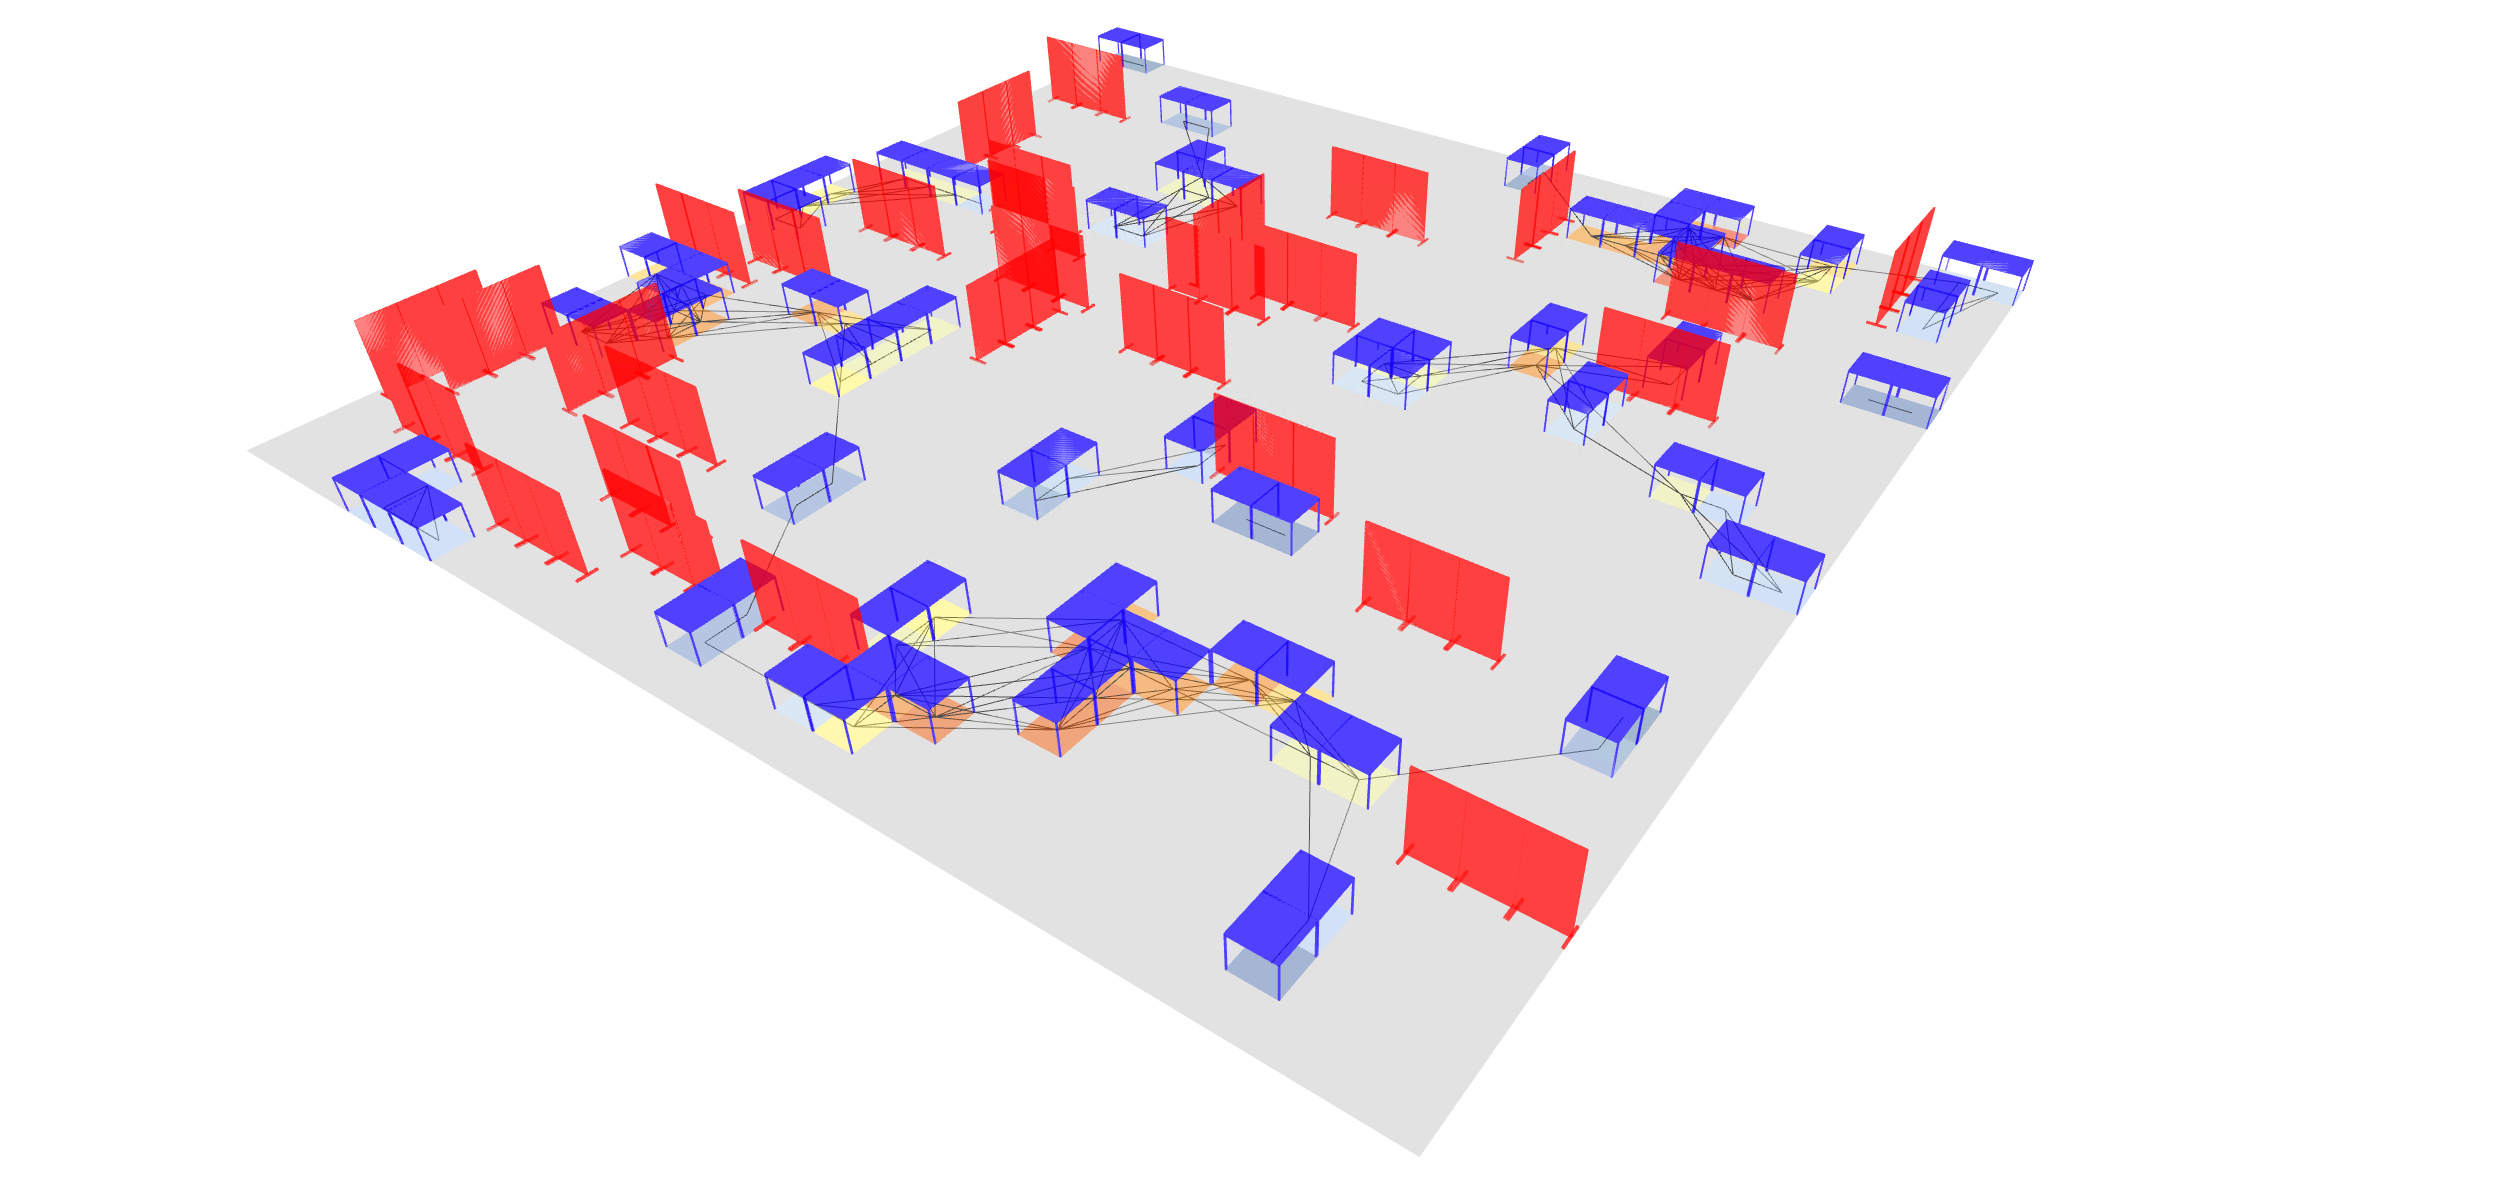